<a href="https://colab.research.google.com/github/Henil21/Rent_prediction/blob/main/Rent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
rent=pd.read_csv("https://raw.githubusercontent.com/Henil21/Data_set/main/Rent.csv")
Rent=pd.get_dummies(rent)
Rent.head()


,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,"Area Locality_ Beeramguda, Ramachandra Puram, NH 9","Area Locality_ in Boduppal, NH 2 2","Area Locality_ in Erragadda, NH 9",...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,20000,800,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,17000,1000,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,10000,800,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2,7500,850,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [15]:
x=Rent.drop("Rent",axis=1)
y=Rent["Rent"]


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [35]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct=make_column_transformer(
    (MinMaxScaler(),["Size","Bathroom"]) ,#turn all the data in 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["Area Type" ,"Area Locality",	"City"	,"Furnishing Status",	"Tenant Preferred"	,"Point of Contact"])
) 
X=rent.drop("Rent",axis=1)
y=rent["Rent"]


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

ct.fit(X_train)
# transform traning and test data with normalization and onehot encoding
x_train_normal=ct.transform(X_train)
x_test_normal=ct.transform(X_test)

In [47]:
x_train_normal

<3796x1938 sparse matrix of type '<class 'numpy.float64'>'
	with 29188 stored elements in Compressed Sparse Row format>

In [43]:
y_n=pd.DataFrame(x_train_normal.toarray())
# pd.DataFrame(y_train.toarray())


In [52]:
tf.random.set_seed(42)
rent_model=tf.keras.Sequential([
    # tf.keras.layers.Dense(1000,activation="relu"),
    # tf.keras.layers.Dense(500,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1),

])
rent_model.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(0.1),
                   metrics=['mae'])

rnt=rent_model.fit(y_n,y_train,epochs=800)

Epoch 1/800
119/119 [==============================] - 1s 4ms/step - loss: 26675.3418 - mae: 26675.3418
Epoch 2/800
119/119 [==============================] - 0s 4ms/step - loss: 19413.4102 - mae: 19413.4102
Epoch 3/800
119/119 [==============================] - 0s 4ms/step - loss: 17443.1777 - mae: 17443.1777
Epoch 4/800
119/119 [==============================] - 0s 4ms/step - loss: 16267.4854 - mae: 16267.4854
Epoch 5/800
119/119 [==============================] - 0s 4ms/step - loss: 15307.9092 - mae: 15307.9092
Epoch 6/800
119/119 [==============================] - 0s 4ms/step - loss: 14501.2012 - mae: 14501.2012
Epoch 7/800
119/119 [==============================] - 0s 4ms/step - loss: 13470.7959 - mae: 13470.7959
Epoch 8/800
119/119 [==============================] - 0s 4ms/step - loss: 12457.6904 - mae: 12457.6904
Epoch 9/800
119/119 [==============================] - 0s 3ms/step - loss: 11558.6709 - mae: 11558.6709
Epoch 10/800
119/119 [==============================] - 0s 4ms/s

In [57]:
rent_model.predict(x_test_normal)

array([[ 16301.999 ],
       [ 16928.459 ],
       [ 28801.383 ],
       [ 72312.12  ],
       [ 98534.28  ],
       [ 15382.944 ],
       [ 51312.805 ],
       [ 10756.282 ],
       [348125.8   ],
       [ 11407.019 ],
       [  9356.524 ],
       [ 11688.256 ],
       [ 22712.602 ],
       [ 14767.326 ],
       [ 22909.34  ],
       [ 13048.034 ],
       [ 84982.78  ],
       [ 12473.395 ],
       [ 12831.271 ],
       [ 61543.664 ],
       [ 24677.7   ],
       [  9069.91  ],
       [ 36023.89  ],
       [ 12830.686 ],
       [184300.11  ],
       [  6746.64  ],
       [  9258.715 ],
       [ 46293.15  ],
       [ 10085.058 ],
       [ 17178.21  ],
       [  7821.3003],
       [ 22804.076 ],
       [  7975.527 ],
       [ 13554.277 ],
       [ 20325.486 ],
       [ 30213.012 ],
       [  8026.0234],
       [  5115.002 ],
       [ 14514.645 ],
       [  5583.2983],
       [ 15002.384 ],
       [383624.38  ],
       [ 17623.408 ],
       [  6378.4253],
       [ 48734.69  ],
       [  

In [58]:
x_test

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,"Area Locality_ Beeramguda, Ramachandra Puram, NH 9","Area Locality_ in Boduppal, NH 2 2","Area Locality_ in Erragadda, NH 9","Area Locality_ in Miyapur, NH 9",...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
1566,2,1100,2,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3159,2,800,2,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
538,2,518,2,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2630,3,1500,3,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4418,3,2235,5,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,2,1248,2,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3400,3,1100,2,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1941,2,950,2,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3679,3,1125,2,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [50]:
y_train.median(),y_train.mean()

(16000.0, 35151.516332982086)

Text(0.5, 0, 'epochs')

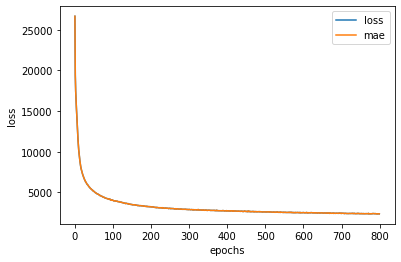

In [54]:
pd.DataFrame(rnt.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
Rent.head()

In [ ]:
x.head()

In [ ]:
rent_model.predict([2,800,2,"1 out of 3","Carpet Area","South Dum Dum","Kolkata","Semi-Furnished","Bachelors","Contact Owner"])